# Fashion MNIST


필요한 라이브러리 및 모듈을 가져온다.

PyTorch와 관련된 컴퓨터 비전 작업을 위한 유틸리티 및 함수가 정의된 pytorchcv.py 파일을 다운로드한다.

torchvision, torchinfo, pytorchcv와 같은 패키지를 설치한다.

PyTorch를 사용하여 MNIST 데이터셋을 로드하고 학습한 후 결과를 시각화하는데 사용되는 몇 가지 함수를 가져온다.

MNIST 데이터셋을 로드하고 지정된 배치 크기로 데이터를 준비한다.

In [1]:
!wget https://raw.githubusercontent.com/MicrosoftDocs/pytorchfundamentals/main/computer-vision-pytorch/pytorchcv.py
%pip install torchvision
%pip install torchinfo
%pip install pytorchcv

import torch
import torch.nn as nn
import torchvision
import matplotlib.pyplot as plt
from torchinfo import summary
import numpy as np
import pytorchcv

from pytorchcv import load_mnist, train, plot_results, plot_convolution, display_dataset
load_mnist(batch_size=128) 

--2024-04-25 04:55:53--  https://raw.githubusercontent.com/MicrosoftDocs/pytorchfundamentals/main/computer-vision-pytorch/pytorchcv.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6540 (6.4K) [text/plain]
Saving to: ‘pytorchcv.py.5’

pytorchcv.py.5      100%[===================>]   6.39K  --.-KB/s    in 0.001s  

2024-04-25 04:55:53 (5.44 MB/s) - ‘pytorchcv.py.5’ saved [6540/6540]

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


## Convolutional filters



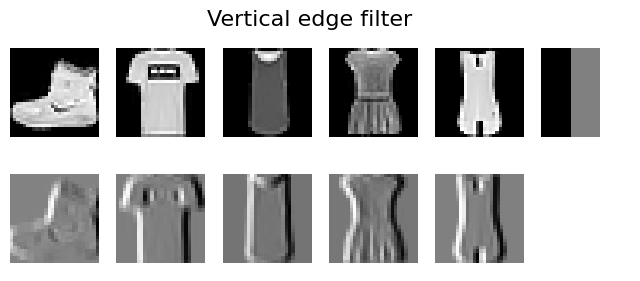

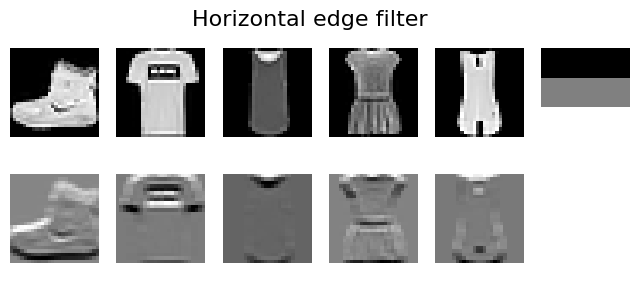

In [2]:
#이 코드는 두 개의 커널을 사용하여 세로 에지 필터와 가로 에지 필터를 시각화한다.
plot_convolution(torch.tensor([[-1.,0.,1.],[-1.,0.,1.],[-1.,0.,1.]]),'Vertical edge filter') # 세로 에지 필터를 시각화
plot_convolution(torch.tensor([[-1.,-1.,-1.],[0.,0.,0.],[1.,1.,1.]]),'Horizontal edge filter') # 가로 에지 필터를 시각화

## Covolutional layers

간단한 컨볼루션 신경망을 정의하고, 이 모델의 구조를 요약해서 출력한다. 

이렇게 요약된 정보는 모델의 구조를 빠르게 파악하고 디버깅 및 최적화에 활용할 수 있다.

In [3]:
# 파이토치(PyTorch)를 사용하여 간단한 신경망 모델을 정의하고, 그 구조를 요약해서 출력하는 과정을 설명

import torch.nn as nn # 파이토치의 신경망 모듈(nn)을 임포트
%pip install torchsummary # 신경망 모델의 요약 정보를 제공하는 torchsummary 라이브러리를 설치
from torchsummary import summary # 설치된 torchsummary에서 summary 함수를 임포트

class OneConv(nn.Module): # nn.Module을 상속받는 OneConv라는 새로운 클래스를 정의하는데 nn.Module은 파이토치에서 모든 신경망 모듈의 기본 클래스
    def __init__(self): # 클래스의 생성자로, OneConv 객체가 생성될 때 초기화 과정을 정의
        super(OneConv, self).__init__() # 상위 클래스인 nn.Module의 생성자를 호출하여 클래스를 적절히 초기화
        self.conv = nn.Conv2d(in_channels=1,out_channels=9,kernel_size=(5,5)) # 입력 채널이 1개, 출력 채널이 9개인 2D 컨볼루션 레이어를 정의하고, 이를 객체의 conv 속성으로 할당
        self.flatten = nn.Flatten() # 다차원 입력을 1차원 배열로 변환하는 Flatten 레이어를 정의하고, flatten 속성으로 할당
        self.fc = nn.Linear(5184,10) # 5,184개의 입력 특성을 10개의 출력 특성으로 변환하는 완전 연결 레이어(또는 선형 레이어)를 정의하고, fc 속성으로 할당

    def forward(self, x): # 모델의 순전파를 정의하는 메서드로 입력 텐서 x가 모델을 통과하는 과정을 설명
        if x.dim() == 5 and x.size(2) == 1:  # 입력 x의 차원이 예상치 못한 추가 차원을 포함하는 경우, 해당 차원을 제거
            x = x.squeeze(2)
        x = nn.functional.relu(self.conv(x)) # 정의된 컨볼루션 레이어를 입력 x에 적용한 후 ReLU 활성화 함수를 적용
        x = self.flatten(x) # ReLU의 출력을 flatten 레이어를 통해 평탄화
        x = nn.functional.log_softmax(self.fc(x),dim=1) # 평탄화된 벡터를 fc 레이어에 적용하고, 결과를 로그 소프트맥스 함수를 통해 처리하는데 이 함수는 다중 클래스 분류 문제에 대한 확률을 계산할 때 사용

        return x  # The final processed tensor x, which contains the log probabilities of the classes, is returned from the forward method. This output can be used by a loss function during training to compute the error and update the model weights

# Create an instance of the network
net = OneConv() # OneConv 클래스의 인스턴스를 생성

# Print the summary of the model
summary(net,input_size=(1,1,28,28)) # 생성된 모델 net의 요약 정보를 출력하는데 여기서 input_size는 모델이 기대하는 입력 데이터의 크기를 (채널 수, 높이, 너비) 형식으로 지정

Note: you may need to restart the kernel to use updated packages.
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 9, 24, 24]             234
           Flatten-2                 [-1, 5184]               0
            Linear-3                   [-1, 10]          51,850
Total params: 52,084
Trainable params: 52,084
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.08
Params size (MB): 0.20
Estimated Total Size (MB): 0.28
----------------------------------------------------------------


## Pooling layers

풀링 레이어는 입력 이미지의 공간적 차원을 축소하여 처리할 특징 맵의 크기를 줄입니다. 이는 연산량을 줄이고, 모델의 복잡도를 감소시킴으로써 효율적인 계산을 가능하게 한다.

풀링 레이어를 적용한 이미지는 입력 이미지보다 해상도가 낮고, 강조된 특징이 보다 명확하게 나타날 것이다.

In [4]:
import torch
import torch.nn as nn

# 신경망 모델 정의
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        
        # Convolutional Layer 1: 입력 채널 1, 출력 채널 16, 커널 크기 3x3, 스트라이드 1, 패딩 1
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3, stride=1, padding=1)
        
        # Max Pooling Layer: 커널 크기 2x2, 스트라이드 2
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        
        # Convolutional Layer 2: 입력 채널 16, 출력 채널 32, 커널 크기 3x3, 스트라이드 1, 패딩 1
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1)
        
        # Fully Connected Layer 1: 입력 크기 32 * 7 * 7, 출력 크기 128
        self.fc1 = nn.Linear(32 * 7 * 7, 128)
        
        # Fully Connected Layer 2: 입력 크기 128, 출력 크기 10
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        # Convolutional Layer 1을 통과한 후 ReLU 활성화 함수 적용
        x = torch.relu(self.conv1(x))
        # Max Pooling Layer를 통과하여 공간적 차원 축소
        x = self.pool(x)
        # Convolutional Layer 2를 통과한 후 ReLU 활성화 함수 적용
        x = torch.relu(self.conv2(x))
        # Max Pooling Layer를 통과하여 공간적 차원 축소
        x = self.pool(x)
        # 텐서 평탄화
        x = x.view(-1, 32 * 7 * 7)
        # Fully Connected Layer 1을 통과한 후 ReLU 활성화 함수 적용
        x = torch.relu(self.fc1(x))
        # Fully Connected Layer 2를 통과하여 클래스 스코어 반환
        x = self.fc2(x)
        return x

# 모델 인스턴스 생성
model = CNN()


## PyTorch를 사용하여 신경망 모델을 학습 & 검증하는 과정 구현

Adam 최적화 도구를 사용하여 모델의 매개변수를 최적화하고 주어진 에폭 수에 대해 반복하면서 모델을 학습하고 평가다.

각 에폭에서는 학습 및 테스트 데이터에 대한 손실과 정확도를 계산하고 이를 기록하고 손실과 정확도를 기록한 history 딕셔너리를 반환한다.

In [5]:
import torch # torch, torch.optim, torch.nn.functional 모듈을 임포트하는데 PyTorch에서 모델을 구성하고 최적화하는 데 필요한 함수와 클래스를 제공
from torch import optim
import torch.nn.functional as F

def train(model, train_loader, test_loader, epochs=5): # 함수를 정의하여 모델, 학습 데이터 로더, 테스트 데이터 로더, 그리고 에폭 수를 매개변수로 받음
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu") # 사용 가능한 경우 CUDA를 사용하고, 그렇지 않으면 CPU를 사용하도록 설정
    model.to(device) # 모델을 해당 장치로 이동
    optimizer = optim.Adam(model.parameters(), lr=0.001) # Adam 최적화 도구를 사용하여 모델의 매개변수를 최적화하고, 학습률은 0.001로 설정
    criterion = torch.nn.CrossEntropyLoss() # 다중 클래스 분류를 위한 크로스 엔트로피 손실 함수를 사용
    
    history = {'train_loss': [], 'train_acc': [], 'test_loss': [], 'test_acc': [], 'val_acc': [], 'val_loss': []}
    
    # 에폭 수만큼 반복하면서 모델의 학습 및 평가를 수행하는데 학습 시에는 model.train()을 호출하여 모델을 학습 모드로 설정하고, 평가 시에는 model.eval()을 호출하여 평가 모드로 설정

    try:
        for epoch in range(epochs):
            model.train()
            train_loss, train_correct, train_total = 0, 0, 0
            # 학습 데이터셋을 사용하여 모델을 학습
            for data, target in train_loader: # # 각 배치 데이터에 대해 데이터와 타겟을 장치로 이동시킨 후, 최적화 도구를 이용해 그래디언트를 초기화하고, 모델을 통해 예측을 수행
                data, target = data.to(device), target.to(device)
                optimizer.zero_grad()
                output = model(data)
                
                if output is None:
                    print("Warning: Model output is None.")
                    continue
                
                loss = criterion(output, target) # 손실을 계산하고, 역전파를 통해 그래디언트를 계산한 다음, 최적화 도구로 매개변수를 업데이트
                if loss is None:
                    print("Warning: Loss computation returned None.")
                    continue
                
                loss.backward()
                optimizer.step()

                # 학습 과정에서의 손실 및 정확도 기록
                train_loss += loss.item() # 정확도와 손실을 기록하여 진행 상황을 모니터링
                _, predicted = torch.max(output.data, 1)
                train_total += target.size(0)
                train_correct += (predicted == target).sum().item()
            
            train_loss /= len(train_loader.dataset)
            train_acc = 100. * train_correct / train_total
            history['train_loss'].append(train_loss)
            history['train_acc'].append(train_acc)

            # 테스트 데이터셋을 사용하여 모델을 평가
            model.eval()
            test_loss, test_correct, test_total = 0, 0, 0
            with torch.no_grad():
                for data, target in test_loader:
                    data, target = data.to(device), target.to(device)
                    output = model(data)
                    if output is None:
                        print("Warning: Model output is None during evaluation.")
                        continue
                    
                    loss = criterion(output, target)
                    if loss is None:
                        print("Warning: Loss computation returned None during evaluation.")
                        continue
                    
                    test_loss += loss.item()
                    _, predicted = torch.max(output.data, 1)
                    test_total += target.size(0)
                    test_correct += (predicted == target).sum().item()
            
            test_loss /= len(test_loader.dataset)
            test_acc = 100. * test_correct / test_total
            history['test_loss'].append(test_loss)
            history['test_acc'].append(test_acc)
            
            # 에폭마다 학습 및 테스트 결과 출력
            print(f'Epoch {epoch+1}/{epochs}: Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}%, Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.2f}%')
        
    except Exception as e: # 에러가 발생할 경우 처리하는데 에러 발생 시 해당 에러 메시지를 출력하고 None을 반환
        print(f"An error occurred: {e}")
        return None
    
    return history # 학습과 테스트 과정에서의 손실과 정확도를 기록한 history 딕셔너리를 반환



## 모델 학습 & 학습 결과 시각화



Epoch 1/5: Train Loss: 0.0040, Train Acc: 82.40%, Test Loss: 0.0033, Test Acc: 85.38%
Epoch 2/5: Train Loss: 0.0028, Train Acc: 87.32%, Test Loss: 0.0030, Test Acc: 86.47%
Epoch 3/5: Train Loss: 0.0025, Train Acc: 88.45%, Test Loss: 0.0029, Test Acc: 87.25%
Epoch 4/5: Train Loss: 0.0024, Train Acc: 89.31%, Test Loss: 0.0028, Test Acc: 87.62%
Epoch 5/5: Train Loss: 0.0022, Train Acc: 89.88%, Test Loss: 0.0027, Test Acc: 87.80%


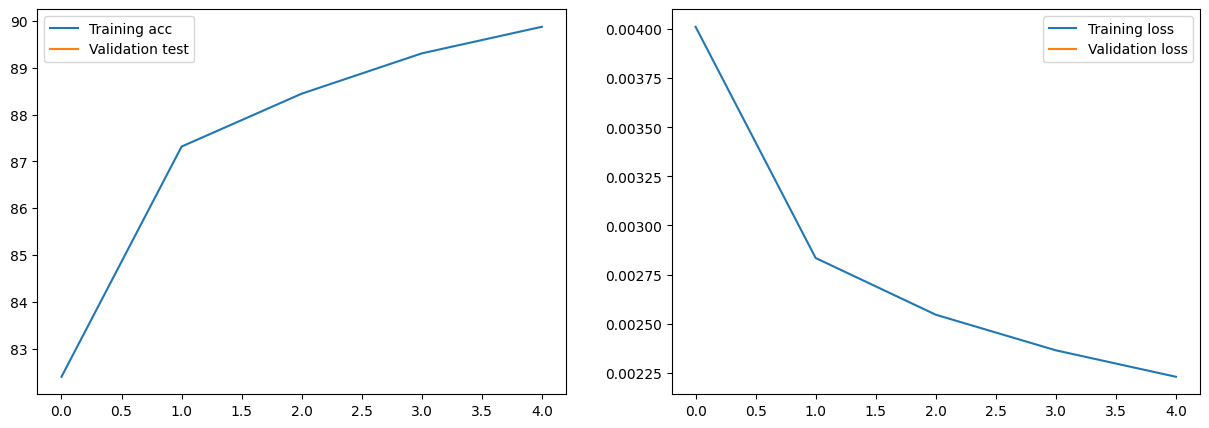

In [6]:
# 신경망 모델 net을 학습시키고 그 결과를 처리하는 과정을 보여줌

# train 함수를 호출하여 신경망 모델 net을 학습시키는데 학습 데이터 로더 train_loader, 테스트 데이터 로더 test_loader를 사용하고, 총 5 에폭(epoch) 동안 학습을 수행하고 학습 과정에서 계산된 손실과 정확도 같은 통계 정보를 hist 변수에 저장
hist = train(net,train_loader,test_loader,epochs=5)

if hist is None: # train 함수에서 반환된 hist가 None인지 확인하는데 None은 학습 과정에서 오류가 발생했거나 예외가 처리되었음을 의미할 수 있음
    print("Training did not return any history.") # 만약 hist가 None이면, "학습이 어떠한 기록도 반환하지 않았습니다."라는 메시지를 출력하는데 이는 학습 과정에서 문제가 발생했음을 사용자에게 알리는 역할

else: # 만약 hist가 None이 아니라 유효한 데이터가 있으면
    plot_results(hist) # plot_results 함수를 호출하여 hist에 저장된 학습 결과(손실과 정확도 등)를 시각화하는데 이 함수는 일반적으로 matplotlib 같은 라이브러리를 사용하여 그래프를 그리고, 모델의 학습 진행 상황을 보여줌

위 셀을 한 번 실행했을 땐, 훈련 정확도가 약 81%에서 약 89%까지 증가했다. 두 번째로 실행했을 땐, 훈련 정확도가 90.47%에서 92.05%까지 증가했다.

계속 실행을 할 수록 훈련 정확도가 증가한다는 것을 알게된다.

## 잘못 분류된 이미지 출력

테스트 데이터셋의 예측과 실제 레이블을 비교하여 잘못 분류된 예측을 추출

"Predicted"는 모델이 예측한 클래스를 나타내고 "Actual"은 해당 이미지의 실제 클래스를 나타낸다.

In [7]:
import torch

def analyze_misclassified(model, test_loader):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.eval()  # 모델을 평가 모드로 설정
    
    misclassified = []  # 잘못 분류된 이미지를 저장할 리스트
    
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            
            # 예측이 틀린 경우를 찾아서 misclassified 리스트에 추가
            for i in range(len(labels)):
                if predicted[i] != labels[i]:
                    misclassified.append((images[i], predicted[i], labels[i]))
    
    return misclassified

# analyze_misclassified 함수를 사용하여 잘못 분류된 이미지 분석
misclassified_images = analyze_misclassified(model, test_loader)

# 결과 출력
for image, predicted, actual in misclassified_images:
    print(f"Predicted: {predicted}, Actual: {actual}")
    # 이미지를 시각화하여 출력하는 코드 추가


Predicted: 1, Actual: 9
Predicted: 2, Actual: 1
Predicted: 2, Actual: 1
Predicted: 1, Actual: 6
Predicted: 1, Actual: 4
Predicted: 1, Actual: 6
Predicted: 1, Actual: 5
Predicted: 1, Actual: 7
Predicted: 1, Actual: 4
Predicted: 1, Actual: 5
Predicted: 1, Actual: 7
Predicted: 1, Actual: 3
Predicted: 1, Actual: 4
Predicted: 1, Actual: 2
Predicted: 1, Actual: 4
Predicted: 1, Actual: 8
Predicted: 2, Actual: 0
Predicted: 1, Actual: 2
Predicted: 1, Actual: 5
Predicted: 1, Actual: 7
Predicted: 1, Actual: 9
Predicted: 1, Actual: 4
Predicted: 1, Actual: 6
Predicted: 2, Actual: 0
Predicted: 1, Actual: 9
Predicted: 1, Actual: 3
Predicted: 1, Actual: 8
Predicted: 2, Actual: 8
Predicted: 1, Actual: 3
Predicted: 1, Actual: 3
Predicted: 2, Actual: 8
Predicted: 1, Actual: 0
Predicted: 1, Actual: 7
Predicted: 1, Actual: 5
Predicted: 1, Actual: 7
Predicted: 1, Actual: 9
Predicted: 1, Actual: 6
Predicted: 2, Actual: 1
Predicted: 2, Actual: 3
Predicted: 1, Actual: 7
Predicted: 2, Actual: 6
Predicted: 1, Ac

## 가장 잘못 분류된 이미지 출력

잘못 분류된 이미지의 수를 출력하고 시각화되어 예측된 레이블과 실제 레이블이 함께 표시

Total misclassified images: 9022
Worst misclassified image: Predicted: 1, Actual: 9


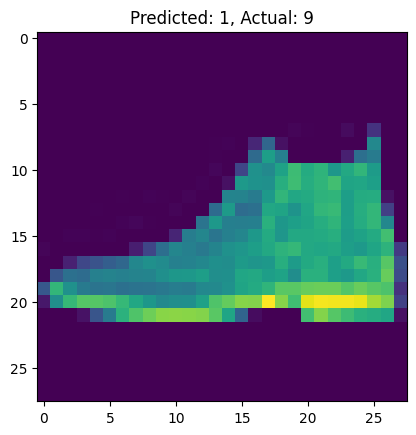

In [10]:
import torch

def analyze_misclassified(model, test_loader):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.eval()  # 모델을 평가 모드로 설정
    
    misclassified = []  # 잘못 분류된 이미지를 저장할 리스트
    
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            
            # 예측이 틀린 경우를 찾아서 misclassified 리스트에 추가
            for i in range(len(labels)):
                if predicted[i] != labels[i]:
                    misclassified.append((images[i], predicted[i], labels[i]))
    
    return misclassified

# analyze_misclassified 함수를 사용하여 잘못 분류된 이미지 분석
misclassified_images = analyze_misclassified(model, test_loader)

# 전체 잘못 분류된 이미지의 수 출력
print(f"Total misclassified images: {len(misclassified_images)}")

# 가장 잘못 분류된 이미지 출력
import matplotlib.pyplot as plt

# 최초 잘못 분류된 이미지 선택
worst_image, predicted_label, actual_label = misclassified_images[0]

# 결과 출력 및 이미지 시각화
print(f"Worst misclassified image: Predicted: {predicted_label}, Actual: {actual_label}")
plt.imshow(worst_image.permute(1, 2, 0))  # 이미지의 채널 순서 변경 (C, H, W) -> (H, W, C)
plt.title(f"Predicted: {predicted_label}, Actual: {actual_label}")
plt.show()
